Лабораторная работа №2 (Pygmo)

In [41]:
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt

Опишем класс оптимизации сразу для 2 функций.

In [42]:
class funcOpt:
    def __init__(self, func, x_min, x_max, y_min, y_max):
        self.func = func
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
    def get_bounds(self):
        return ([self.x_min, self.y_min], [self.x_max, self.y_max])
    
    def fitness(self,x):
        if self.func == 'Matias':
           function_value = 0.26 * (x[0]*x[0] + x[1]*x[1]) - 0.48*x[0]*x[1] 
        elif self.func == 'Himmelblau':
            function_value = (x[0] * x[0] + x[1] - 11)**2 + (x[0] + x[1] * x[1] - 7)**2
        return[function_value]

In [43]:
matias = funcOpt('Matias', -10, 10, -10, 10)
him = funcOpt('Himmelblau', -5, 5, -5, 5)

In [44]:
prob1 = pg.problem(matias)
prob2 = pg.problem(him)
print((prob1),(prob2))

Problem name: <class '__main__.funcOpt'>
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none
 Problem name: <class '__main__.funcOpt'>
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [5, 5]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



В качестве алгоритма мозьмем колонию пчел. 

In [45]:
algo = pg.algorithm(pg.bee_colony(gen = 1, limit = 50, seed=1231123))
pop = pg.population(prob1, size = 20)

In [46]:
N = 100

individuals_list = []
fitness_list = []

for i in range(N):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

Выведем результат.

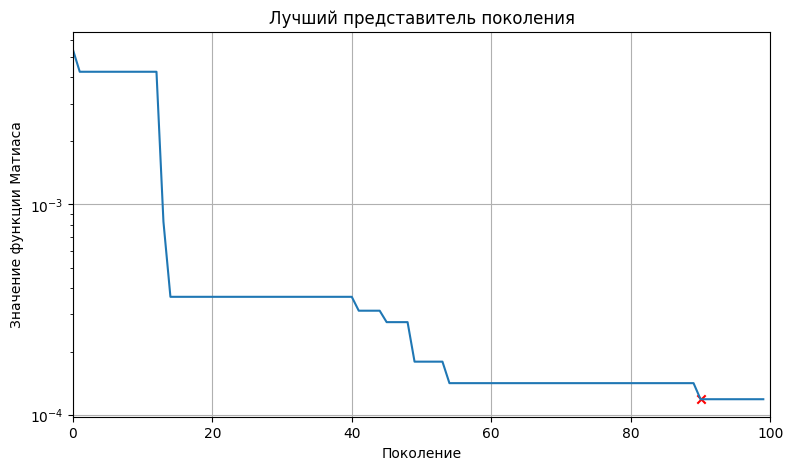

In [47]:
# минимизация за все поколения
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, N), fitness_list)


champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

ax.set_xlim((0, N))
ax.grid('minor')
ax.set_title('Лучший представитель поколения')
ax.set_xlabel('Поколение')
ax.set_ylabel('Значение функции Матиаса')
ax.set_yscale('log')

plt.show()

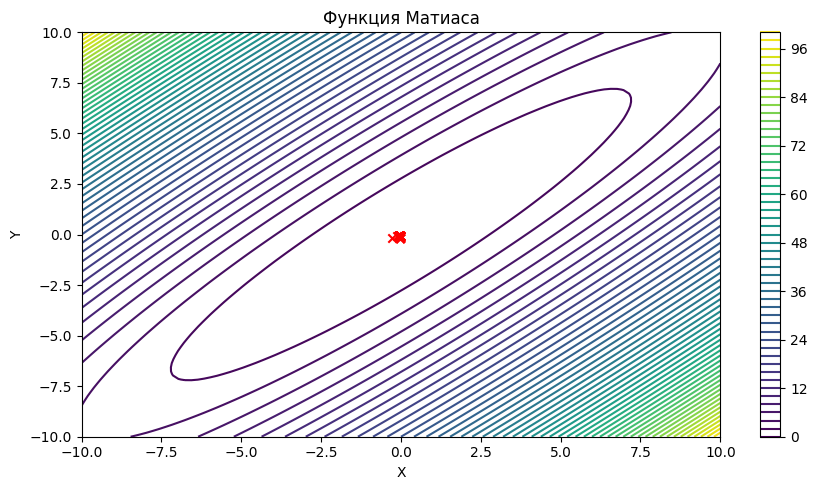

In [48]:
best_x = [i[0] for i in individuals_list]
best_y = [i[1] for i in individuals_list]
(x_min, y_min), (x_max, y_max) = matias.get_bounds()

grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = matias.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Матиаса')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
plt.tight_layout()

plt.show()

В качестве второго алгоритма возьмем колонию муравьев.

In [49]:
algo = pg.algorithm(pg.gaco(gen = 1, seed = 123123123))
pop = pg.population(prob1, size = 500)

In [50]:
N = 100

individuals_list = []
fitness_list = []

for i in range(N):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

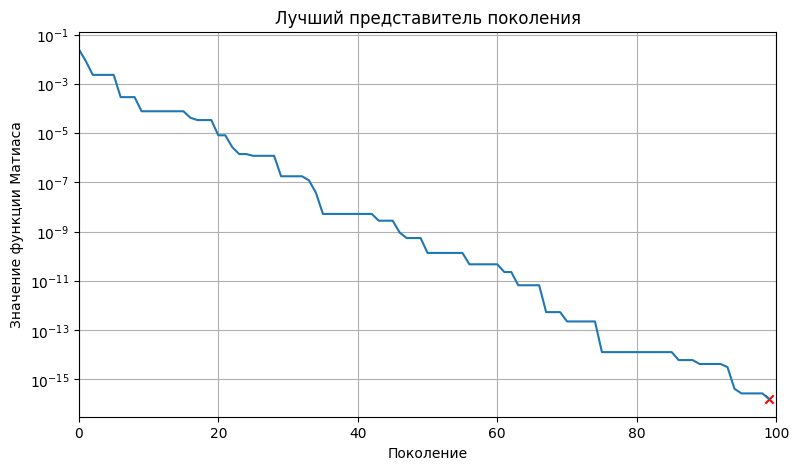

In [51]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, N), fitness_list)


champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

ax.set_xlim((0, N))
ax.grid('minor')
ax.set_title('Лучший представитель поколения')
ax.set_xlabel('Поколение')
ax.set_ylabel('Значение функции Матиаса')
ax.set_yscale('log')

plt.show()

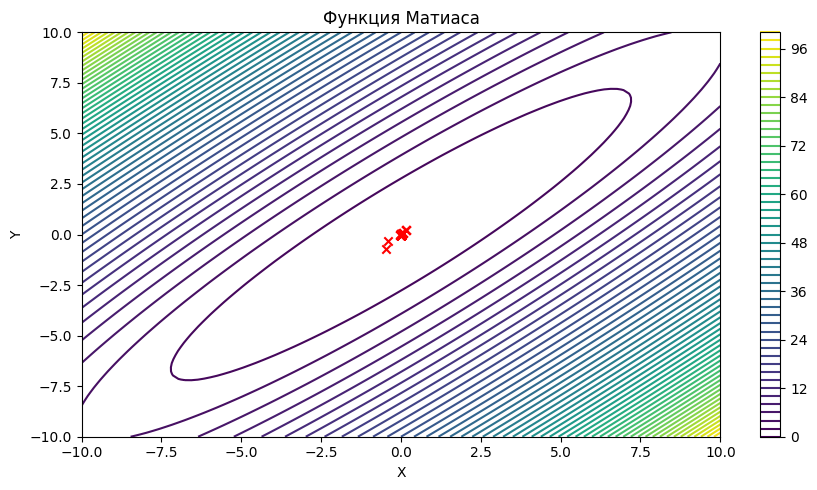

In [52]:
best_x = [i[0] for i in individuals_list]
best_y = [i[1] for i in individuals_list]
(x_min, y_min), (x_max, y_max) = matias.get_bounds()

grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = matias.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Матиаса')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
plt.tight_layout()

plt.show()

Тоже самое только для функции Химмельблау.

In [53]:
algo = pg.algorithm(pg.bee_colony(gen = 1, limit = 50, seed=1231123))
pop = pg.population(prob2, size = 20)

In [54]:
N = 100

individuals_list = []
fitness_list = []

for i in range(N):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

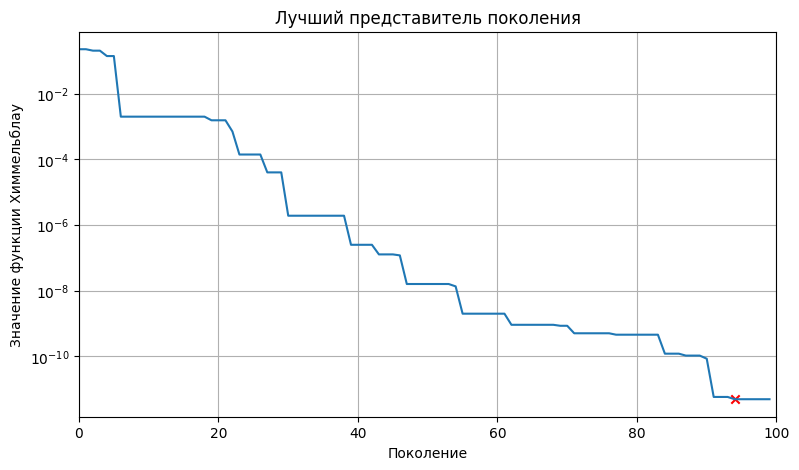

In [55]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, N), fitness_list)


champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

ax.set_xlim((0, N))
ax.grid('minor')
ax.set_title('Лучший представитель поколения')
ax.set_xlabel('Поколение')
ax.set_ylabel('Значение функции Химмельблау')
ax.set_yscale('log')

plt.show()

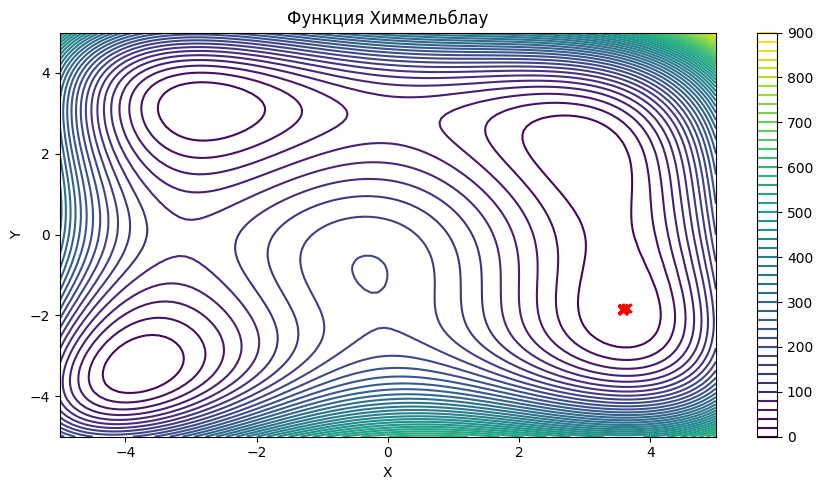

In [56]:
best_x = [i[0] for i in individuals_list]
best_y = [i[1] for i in individuals_list]
(x_min, y_min), (x_max, y_max) = him.get_bounds()

grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = him.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Химмельблау')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
plt.tight_layout()
plt.show()

In [57]:
algo = pg.algorithm(pg.gaco(gen = 1, seed = 123123123))
pop = pg.population(prob2, size = 500)

In [58]:
N = 100

individuals_list = []
fitness_list = []

for i in range(N):
    pop = algo.evolve(pop)
    individuals_list.append(pop.get_x()[pop.best_idx()])
    fitness_list.append(pop.get_f()[pop.best_idx()])

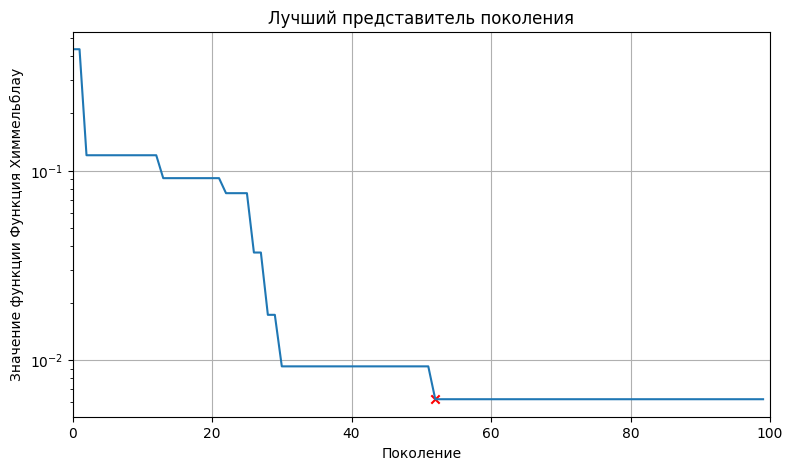

In [59]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(np.arange(0, N), fitness_list)

champion_n = np.argmin(np.array(fitness_list))
ax.scatter(champion_n, np.min(fitness_list), marker='x', color='r')

ax.set_xlim((0, N))
ax.grid('minor')
ax.set_title('Лучший представитель поколения')
ax.set_xlabel('Поколение')
ax.set_ylabel('Значение функции Функция Химмельблау')
ax.set_yscale('log')

plt.show()


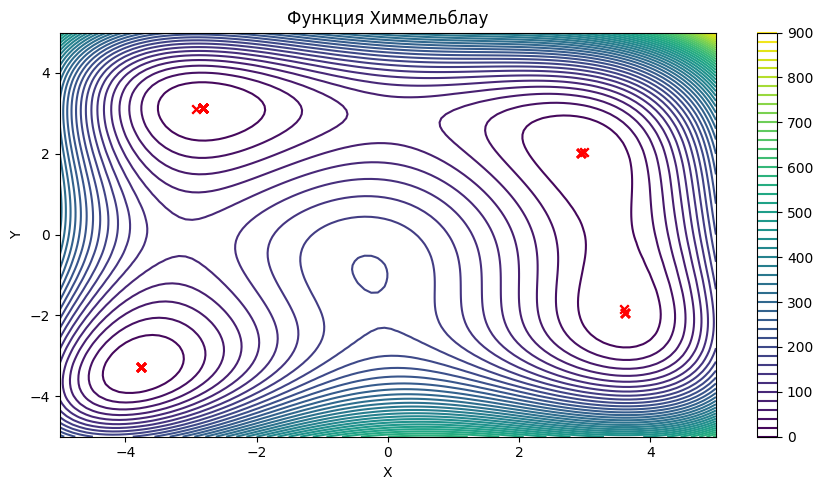

In [60]:
best_x = [i[0] for i in individuals_list]
best_y = [i[1] for i in individuals_list]
(x_min, y_min), (x_max, y_max) = him.get_bounds()

grid_points = 100
x_vector = np.linspace(x_min, x_max, grid_points)
y_vector = np.linspace(y_min, y_max, grid_points)
x_grid, y_grid = np.meshgrid(x_vector, y_vector)
z_grid = np.zeros((grid_points, grid_points))
for i in range(x_grid.shape[1]):
    for j in range(x_grid.shape[0]):
        z_grid[i, j] = him.fitness([x_grid[i, j], y_grid[i, j]])[0]

fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(x_grid, y_grid, z_grid, 50)

ax.scatter(best_x, best_y, marker='x', color='r')

ax.set_xlim((x_min, x_max))
ax.set_ylim((y_min, y_max))
ax.set_title('Функция Химмельблау')
ax.set_xlabel('X')
ax.set_ylabel('Y')
cbar = fig.colorbar(cs)
plt.tight_layout()
plt.show()